In [4]:

from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from utils.utils_embedding import evaluate_embedding, dataframe_results, load_qa_dataset, plot_topk_results, evaluate_different_top_k
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/opt/homebrew/Caskroom/miniconda/base/envs/agent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Settings

In [5]:
# load dataset QA
dataset_name = "QA/gpt-35-turbo_dataset.json"
# results top-k
top_k = 5
model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
list_top_k = [1, 3, 5, 10, 20]

# Load QA synthetic dataset

In [6]:
it_dataset = load_qa_dataset(dataset_name)

2025-07-23 10:34:28.469 | INFO     | utils.utils_embedding:load_qa_dataset:16 - Loading dataset from QA/gpt-35-turbo_dataset.json


# View QA dataset sample

In [7]:
print(it_dataset.queries["6c67a361-1d84-4876-8ed5-72e11dd2f21e"])
print(it_dataset.relevant_docs["6c67a361-1d84-4876-8ed5-72e11dd2f21e"])
print(it_dataset.corpus["80b9998c-32d4-42f7-94a7-1a36155b382b"])

Qual è la data del documento di lavoro dei servizi della Commissione Europea sulla relazione per paese 2025 dell'Italia?
['80b9998c-32d4-42f7-94a7-1a36155b382b']
IT   IT 
 
 
 COMMISSIONE  
EUROPEA   
Bruxelles, 4.6.2025  
SWD(2025) 212 final  
 
DOCUMENTO DI LAVORO DEI SERVIZI DELLA COMMISSIONE  
Relazione per paese 2025 - Italia  
che accompagna il documento  
Raccomandazione di RACCOMANDAZIONE DEL CONSIGLIO  
sulle politiche economiche, sociali, occupazionali, strutturali e di bilancio dell'Italia  
{COM(2025)  212 final}


# HuggingFace: paraphrase-multilingual-MiniLM-L12-v2

In [8]:
embed_model_paraphrase_l12 = HuggingFaceEmbedding(model_name=model_name)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


# Evaluate with is_hit and mrr


In [9]:
df_paraphrase_l12_results_it = evaluate_embedding(dataset=it_dataset, 
                                        embed_model=embed_model_paraphrase_l12, 
                                        top_k=top_k, 
                                        verbose=True)
print(len(df_paraphrase_l12_results_it))
df_paraphrase_l12_results_it.head()

Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:04<00:00, 62.59it/s]

260


,is_hit,mrr,retrieved,expected,query
0,True,1.0,"[80b9998c-32d4-42f7-94a7-1a36155b382b, ca82b43...",80b9998c-32d4-42f7-94a7-1a36155b382b,6c67a361-1d84-4876-8ed5-72e11dd2f21e
1,False,0.0,"[e81fb935-4ea8-4a80-867d-ed15f40d0a0c, 0ddb84a...",93b772d4-52a6-44a6-a331-0eae1fdf33a5,5377179f-f310-4498-9a81-4a644d21eef6
2,True,1.0,"[f612986a-0b1a-4c12-bdf1-2c2107733db7, f1b6e8e...",f612986a-0b1a-4c12-bdf1-2c2107733db7,a980095d-5cd4-4112-9b80-d3d1e7023f44
3,True,1.0,"[b87e8ec1-9380-48ad-9428-47c47ede0e76, c0f6569...",b87e8ec1-9380-48ad-9428-47c47ede0e76,364684a1-eafa-4081-ba35-bb669d1657b7
4,True,0.5,"[e96386a3-3796-457d-875e-2d6c7bdab02f, 4a5026b...",4a5026bd-2856-497f-8276-9de39b7562e6,2356fbfa-7df2-467d-ac72-ef26ed474fff


In [10]:
df_results_no_finetuning_topk = dataframe_results(top_k, df_paraphrase_l12_results_it, finetuned=False)
df_results_no_finetuning_topk

,model,finetuned,top_k,mrr,is_hit
0,paraphrase-multilingual-MiniLM-L12-v2,False,5,0.530641,0.653846


# evaluate for different top-k

In [11]:
df_results_no_finetuning = evaluate_different_top_k(it_dataset, embed_model_paraphrase_l12, list_top_k)
df_results_no_finetuning

2025-07-23 10:34:45.509 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=1


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 79.18it/s]
2025-07-23 10:34:49.954 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=3


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 79.85it/s]
2025-07-23 10:34:54.324 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=5


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 79.76it/s]
2025-07-23 10:34:58.703 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=10


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 78.61it/s]
2025-07-23 10:35:03.142 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=20


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 77.60it/s]


,model,finetuned,top_k,mrr,is_hit
0,paraphrase-multilingual-MiniLM-L12-v2,False,1,0.453846,0.453846
1,paraphrase-multilingual-MiniLM-L12-v2,False,3,0.519872,0.607692
2,paraphrase-multilingual-MiniLM-L12-v2,False,5,0.530641,0.653846
3,paraphrase-multilingual-MiniLM-L12-v2,False,10,0.537966,0.707692
4,paraphrase-multilingual-MiniLM-L12-v2,False,20,0.542058,0.765385


# plot results for different top-k

remind: i am using only training set

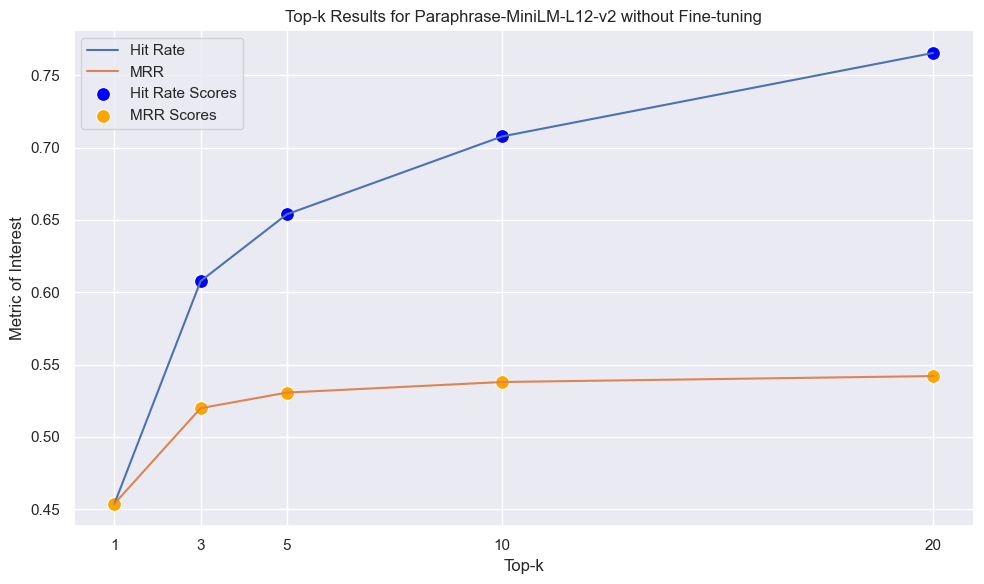

In [12]:
plot_topk_results(df_results_no_finetuning, "Top-k Results for Paraphrase-MiniLM-L12-v2 without Fine-tuning")

# Embedding finetunig

In [15]:
from llama_index.finetuning import SentenceTransformersFinetuneEngine
from utils.utils_embedding import load_qa_dataset

dataset_name = "QA/gpt-35-turbo_temperature_07_dataset.json"
model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
model_output_path_name = f"finetuned-sentence-transformers/finetuned-paraphrase-multilingual-MiniLM-L12-v2_{dataset_name.split('/')[-1].split('.')[0]}"

def run_finetuning(dataset_name, model_name, model_output_path_name):
    """ 
    Finetune the Sentence Transformers model on the specified dataset.
    """
    qa_dataset = load_qa_dataset(dataset_name)
    finetune_engine = SentenceTransformersFinetuneEngine(
                                                        qa_dataset,
                                                        model_id=model_name,
                                                        model_output_path=model_output_path_name,
                                                        val_dataset=qa_dataset,
                                                        )
    finetune_engine.finetune()
    finetuned_embed_model = finetune_engine.get_finetuned_model()
    return finetuned_embed_model

finetuned_embed_model = run_finetuning(dataset_name, model_name, model_output_path_name)
finetuned_embed_model

2025-07-23 10:37:29.532 | INFO     | utils.utils_embedding:load_qa_dataset:16 - Loading dataset from QA/gpt-35-turbo_temperature_07_dataset.json


INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Load pretrained SentenceTransformer: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


Step,Training Loss,Validation Loss,Cosine Accuracy@1,Cosine Accuracy@3,Cosine Accuracy@5,Cosine Accuracy@10,Cosine Precision@1,Cosine Precision@3,Cosine Precision@5,Cosine Precision@10,Cosine Recall@1,Cosine Recall@3,Cosine Recall@5,Cosine Recall@10,Cosine Ndcg@10,Cosine Mrr@10,Cosine Map@100
23,No log,No log,0.549550,0.680180,0.725225,0.779279,0.549550,0.226727,0.145045,0.077928,0.549550,0.680180,0.725225,0.779279,0.661852,0.624337,0.632687
46,No log,No log,0.558559,0.711712,0.756757,0.819820,0.558559,0.237237,0.151351,0.081982,0.558559,0.711712,0.756757,0.819820,0.687219,0.644986,0.651630


INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Information Retrieval Evaluation of the model on the  dataset in epoch 1.0 after 23 steps:
Information Retrieval Evaluation of the model on the  dataset in epoch 1.0 after 23 steps:
INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Queries: 222
Queries: 222
INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Corpus: 222

Corpus: 222

INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Score-Function: cosine
Score-Function: cosine
INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Accuracy@1: 54.95%
Accuracy@1: 54.95%
INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Accuracy@3: 68.02%
Accuracy@3: 68.02%
INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Accuracy@5: 72.52%
Accuracy@5: 72.52%
INFO:sentence_transformers.evaluation.InformationRetrievalEvaluator:Accuracy@10: 77.93%
Accuracy@10: 77.93%
INFO:sentence_transfor

HuggingFaceEmbedding(model_name='finetuned-sentence-transformers/finetuned-paraphrase-multilingual-MiniLM-L12-v2_gpt-35-turbo_temperature_07_dataset', embed_batch_size=10, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x326a9a1d0>, num_workers=None, embeddings_cache=None, max_length=128, normalize=True, query_instruction=None, text_instruction=None, cache_folder=None, show_progress_bar=False)

In [12]:
df_results_finetuning = evaluate_different_top_k(it_dataset, finetuned_embed_model, list_top_k)

2025-07-22 16:08:38.776 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=1


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 77.42it/s]
2025-07-22 16:08:43.324 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=3


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 76.13it/s]
2025-07-22 16:08:47.902 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=5


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 78.36it/s]
2025-07-22 16:08:52.365 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=10


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 78.45it/s]
2025-07-22 16:08:56.875 | INFO     | utils.utils_embedding:evaluate_different_top_k:160 - Evaluating for top_k=20


Some nodes are missing content, skipping them...


100%|██████████| 260/260 [00:03<00:00, 76.99it/s]


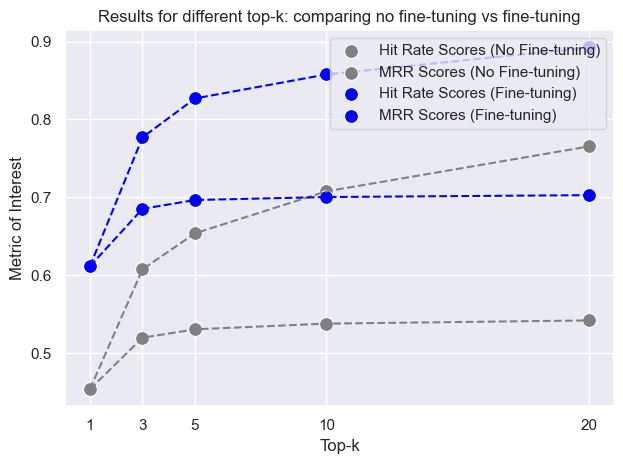

In [29]:
sns.lineplot(data=df_results_no_finetuning, x="top_k", y="is_hit", color="gray", linestyle='--')
sns.lineplot(data=df_results_no_finetuning, x="top_k", y="mrr", color="gray", linestyle='--')
sns.scatterplot(data=df_results_no_finetuning, x="top_k", y="is_hit", color="gray", s=100, label=f"Hit Rate Scores (No Fine-tuning)", marker='o')
sns.scatterplot(data=df_results_no_finetuning, x="top_k", y="mrr", color="gray", s=100, label=f"MRR Scores (No Fine-tuning)", marker='o')

sns.lineplot(data=df_results_finetuning, x="top_k", y="is_hit", color="blue", linestyle='--')
sns.lineplot(data=df_results_finetuning, x="top_k", y="mrr", color="blue", linestyle='--')
sns.scatterplot(data=df_results_finetuning, x="top_k", y="is_hit", color="blue", s=100, label=f"Hit Rate Scores (Fine-tuning)", marker='o')
sns.scatterplot(data=df_results_finetuning, x="top_k", y="mrr", color="blue", s=100, label=f"MRR Scores (Fine-tuning)", marker='o')

plt.title("Results for different top-k: comparing no fine-tuning vs fine-tuning")
plt.xlabel("Top-k")
plt.ylabel("Metric of Interest")
plt.xticks(ticks=df_results_no_finetuning["top_k"].unique())
plt.grid(True)
plt.tight_layout()
plt.show()